# Evaluation of ONNX model converted from PyTorch

## Importing images

In [1]:
imageFiles = FileNames[All, FileNameJoin[{".", "images"}]]

{./images/aeroplane.jpg, ./images/cat.jpg, ./images/flower.jpg, ./images/football.jpg, 
 
>   ./images/pigeon.jpg}

{-Image-, -Image-, -Image-, -Image-, -Image-}
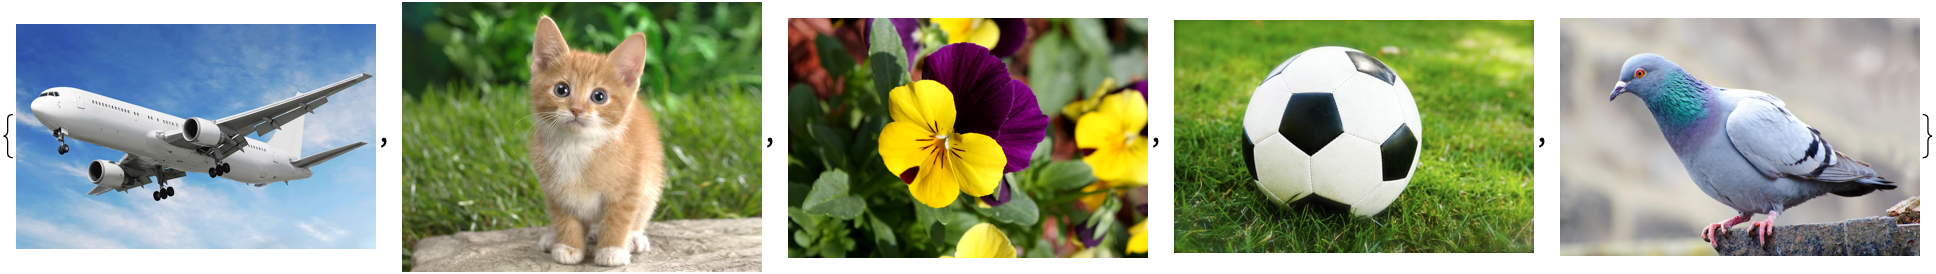

In [2]:
images = Import /@ imageFiles

## Preprocessing images

The ResNet18 takes an image of dimensions {3, 224, 224} where the first index denotes the channel and the subsequent indices denote the width and height. However, the images imported in mathematica are 3D arrays where the third dimension corresponds to the channel. Thus a preprocessing step is required to fix this.

### More transfromations

The input channels must be normalized individually based on these parameters:

   - Mean: [0.485, 0.456, 0.406]  
   - Standard Deviation: [0.229, 0.224, 0.225]

In [3]:
transformImage[image_] := Module[
    {mean, sd, resizedImage, channelData, channelR, channelG, channelB},
    mean = {0.458, 0.456, 0.406};
    sd = {0.229, 0.224, 0.225};
    resizedImage = ImageResize[image, {224, 224}];
    channelData = ImageData /@ ColorSeparate[resizedImage];
    channelR = Standardize[channelData[[1]], mean[[1]] &, sd[[1]] &];
    channelG = Standardize[channelData[[2]], mean[[2]] &, sd[[2]] &];
    channelB = Standardize[channelData[[3]], mean[[3]] &, sd[[3]] &];
    {channelR, channelG, channelB}
]

In [4]:
transformedImages = transformImage /@ images;

## Import Model and Labels

In [5]:
resnet = Import["resnet18.onnx"];
config = Import["resnet18/config.json"];
labels = Association[First[Values[FilterRules[config, "id2label"]]]];

In [8]:
predictImage[image_] := Module[
    {result, maxIndex},
    result = resnet[image];
    maxIndex = ToString[Position[result, Max[result]][[1, 1]]];
    labels[[maxIndex]] 
]

In [9]:
predictions = predictImage[#]& /@ transformedImages;

-Image-              -Image-     -Image-   -Image-
 
>    -Image-

airship, dirigible   tiger cat   daisy     sock      ruffed grouse, partridge, Bonasa\
 
>    umbellus
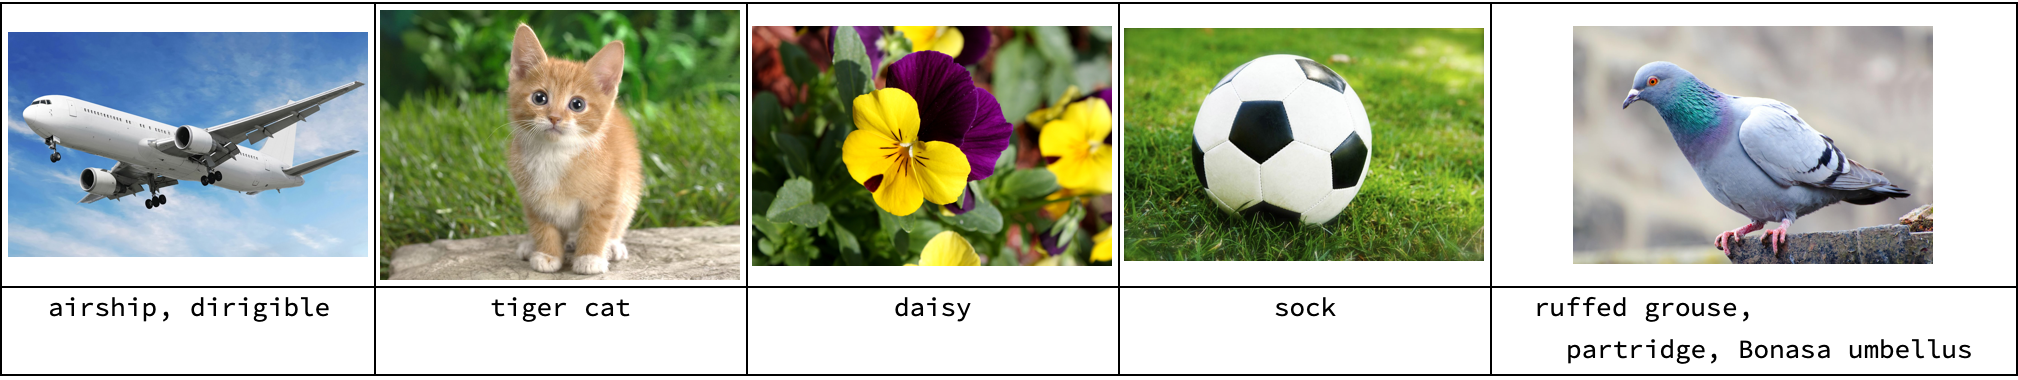

In [17]:
Grid[{images, predictions}, Dividers -> All]